### **Importar las librerías**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **Generar datos lineales y aleatorios**

In [2]:
# Generamos datos aleatoreos de pesos, altura y edad

edad = np.random.randint(1,80,50)
altura = np.random.randint(160,199,50)
peso = np.random.randint(50,100,50)

## **Gráfico de dispersión**

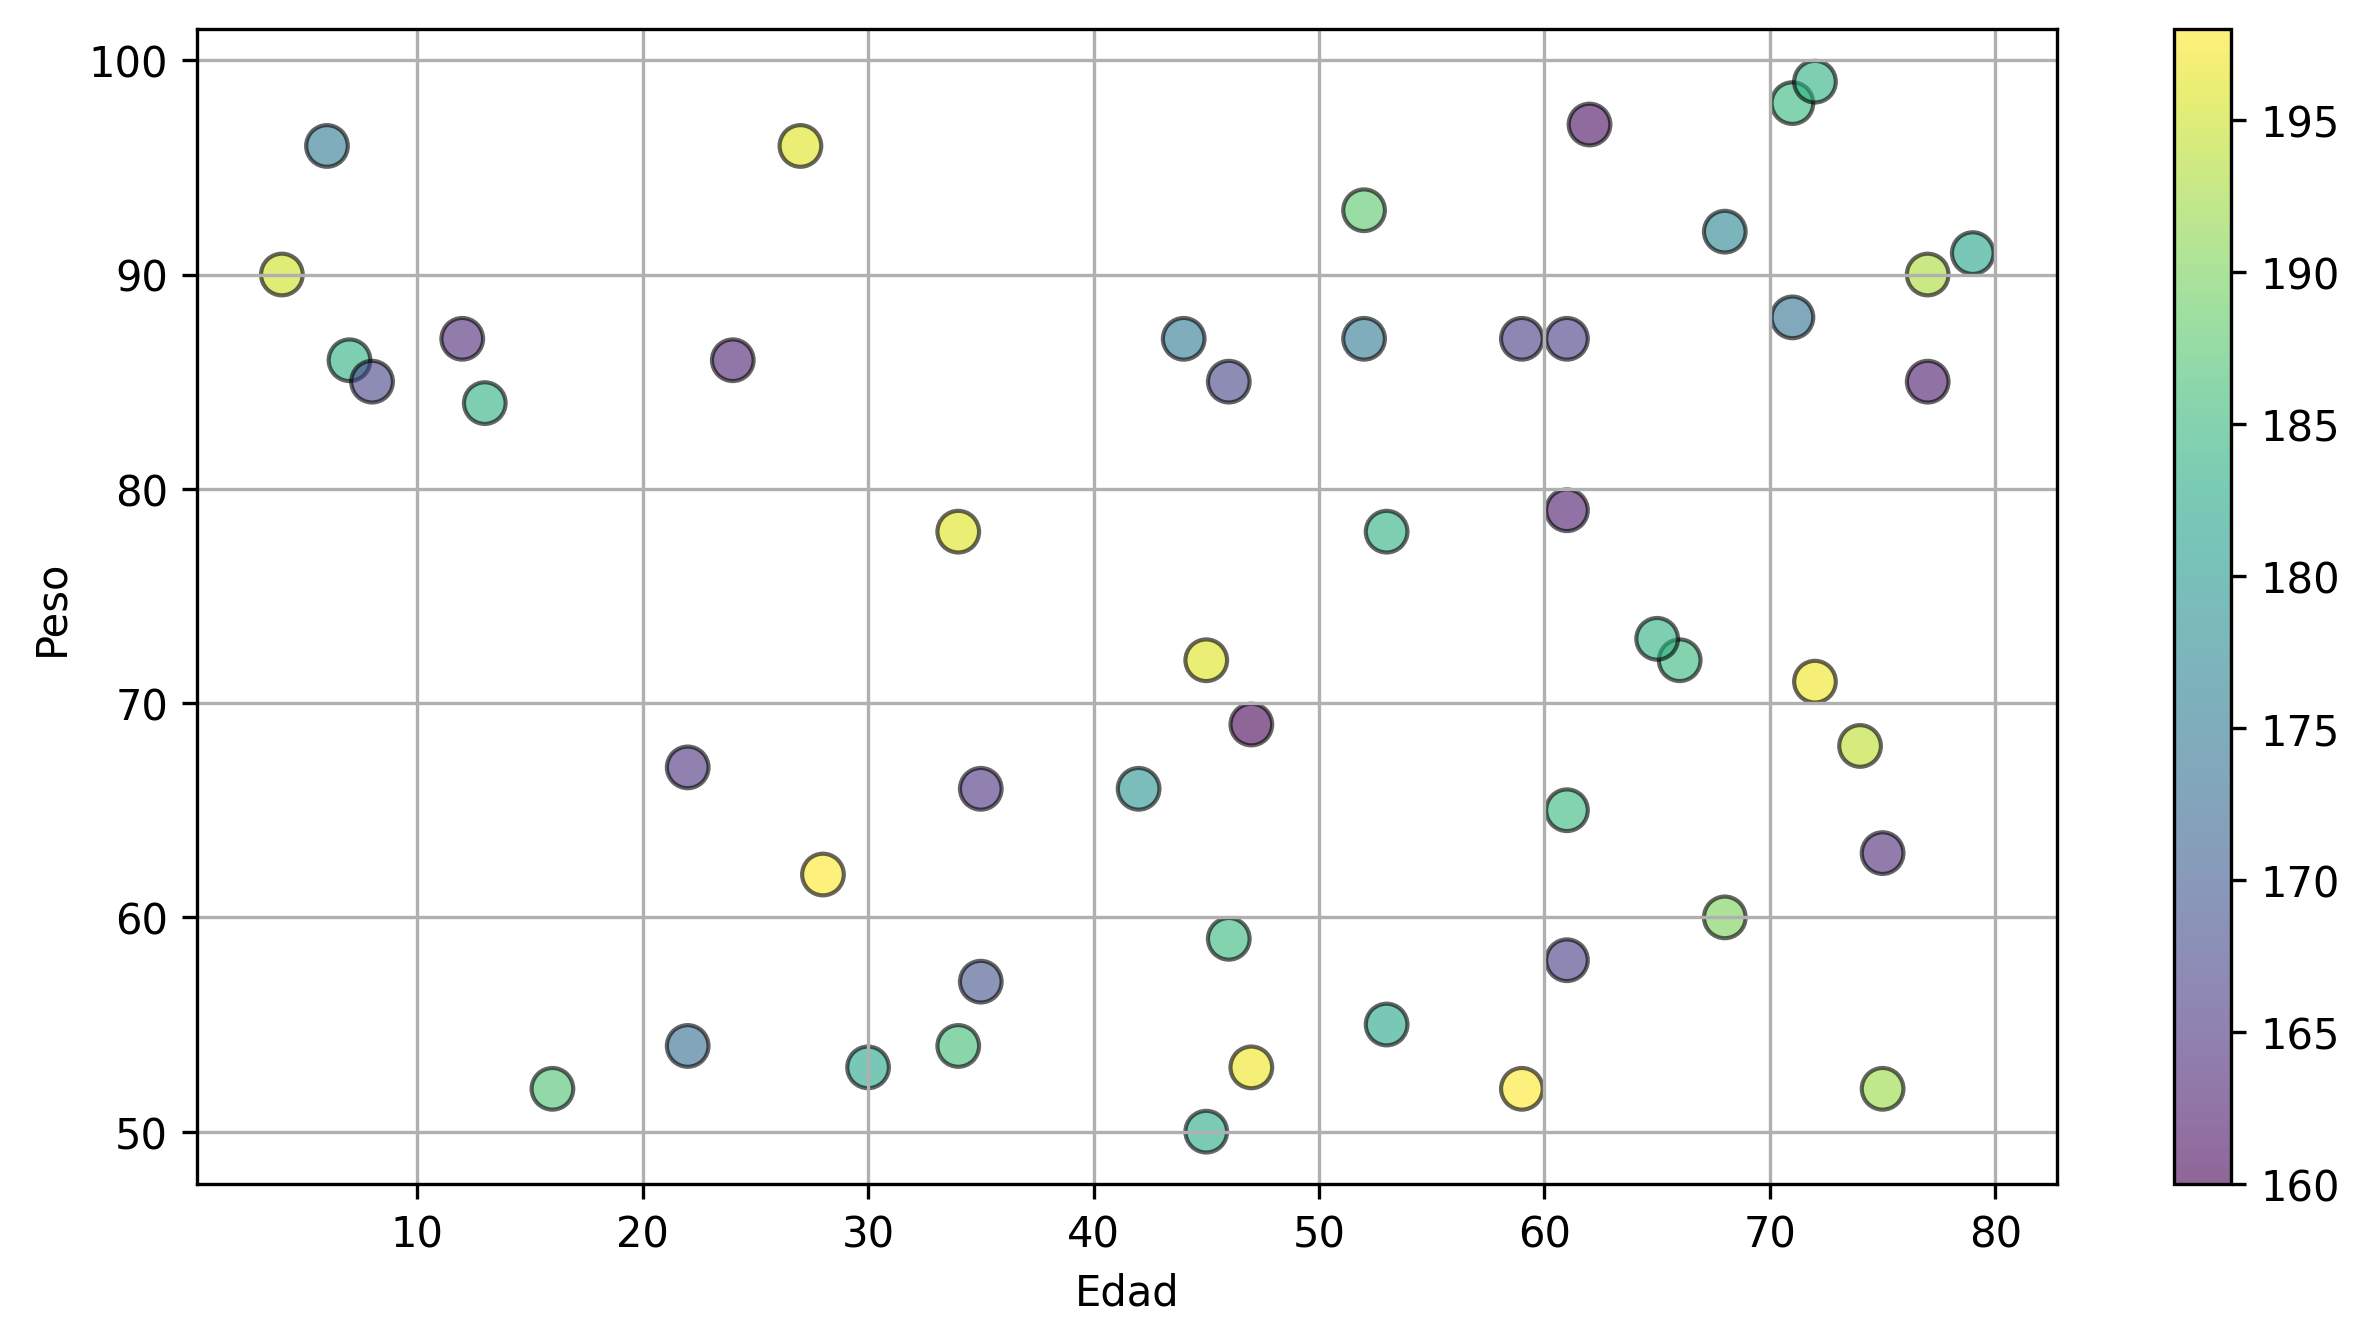

In [3]:
plt.figure(figsize=(10,5),dpi=300)
plt.scatter(edad,peso,c=altura,cmap='viridis',s=100,alpha=0.6,edgecolors='black')
plt.xlabel('Edad')
plt.ylabel('Peso')
plt.grid()
plt.colorbar()
plt.show()

## **Gráfico de barras**

### **Generar datos categóricos**

In [4]:
np.random.seed(0)
categorias = ["Python", "JavaScript","Data Science", "Notion","PHP"]
valores = np.random.randint(1,20,size=len(categorias))


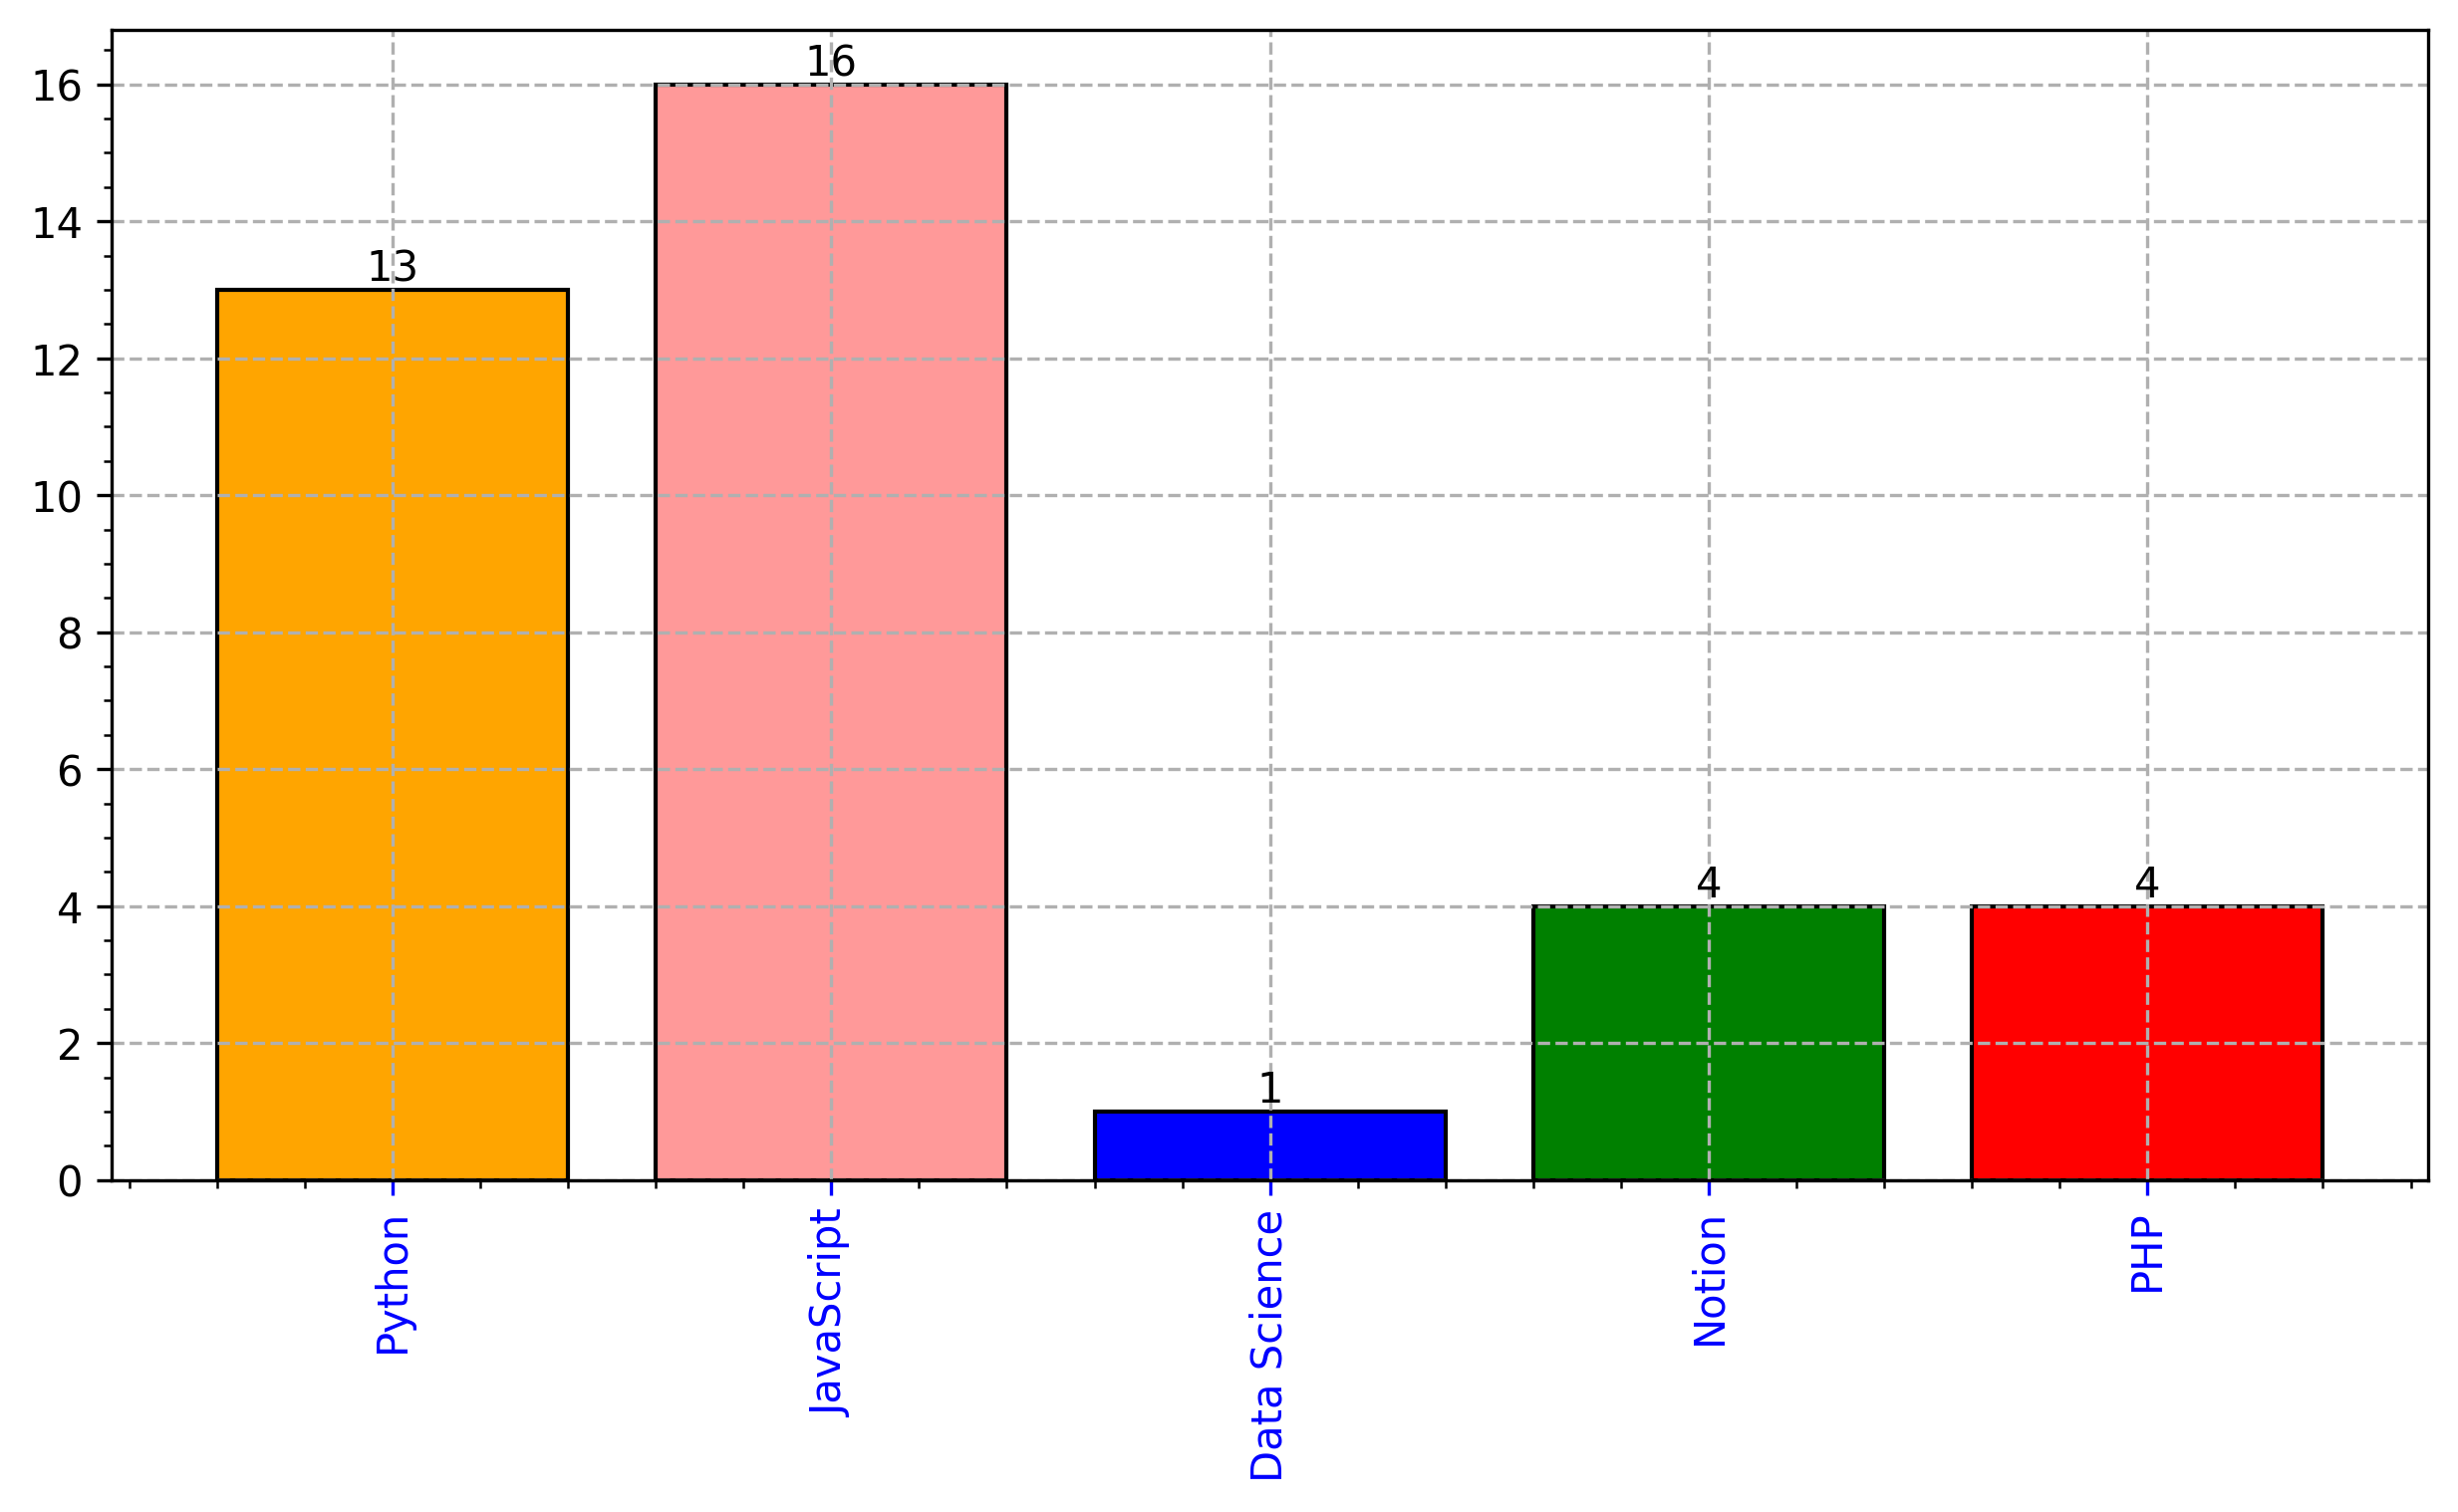

In [5]:
plt.figure(figsize=(10,5),dpi=300)
barras = plt.bar(categorias,valores,color=['orange','#FF9999',"blue","green","red"],edgecolor="black")
plt.xticks(rotation=90)
plt.minorticks_on()
plt.grid(which="major",linestyle="--")
plt.tick_params(axis="x",colors="blue")

for barra in barras:
    valor_y = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2.0,valor_y, int(valor_y), ha='center',va='bottom')
plt.show()

### **Gráfico de tortas**

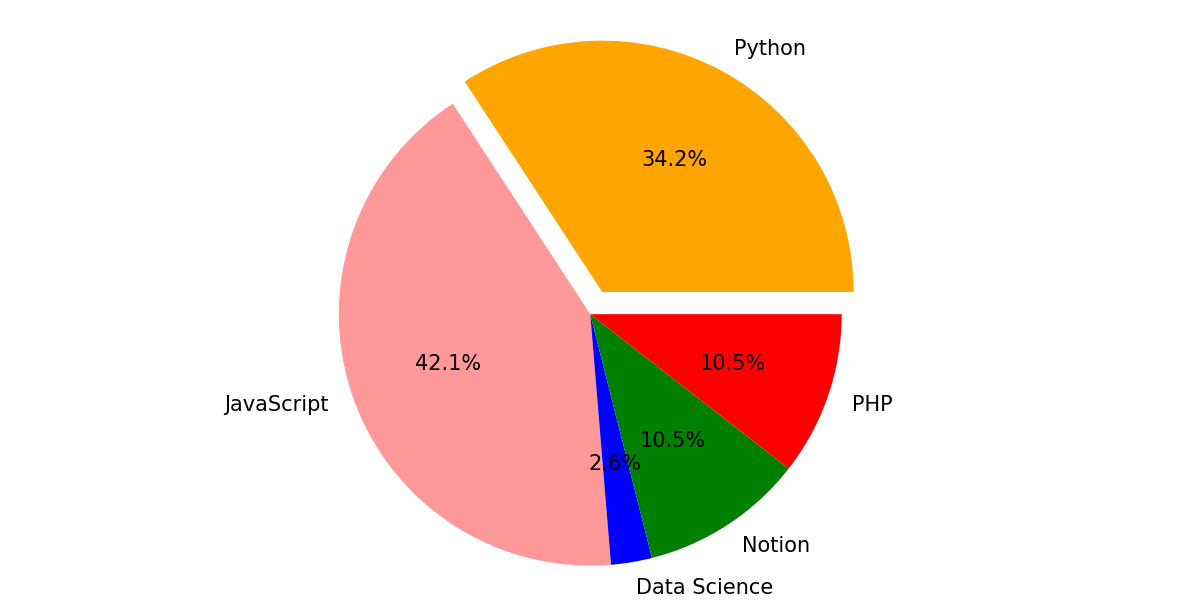

In [6]:
plt.figure(figsize=(10,5),dpi=150)
separacion = (0.1,0,0,0,0)
plt.pie(valores,labels=categorias,colors=['orange','#FF9999',"blue","green","red"],autopct="%1.1f%%",explode=separacion)
plt.axis("equal")
plt.show()

### **Gráfico en 3D**

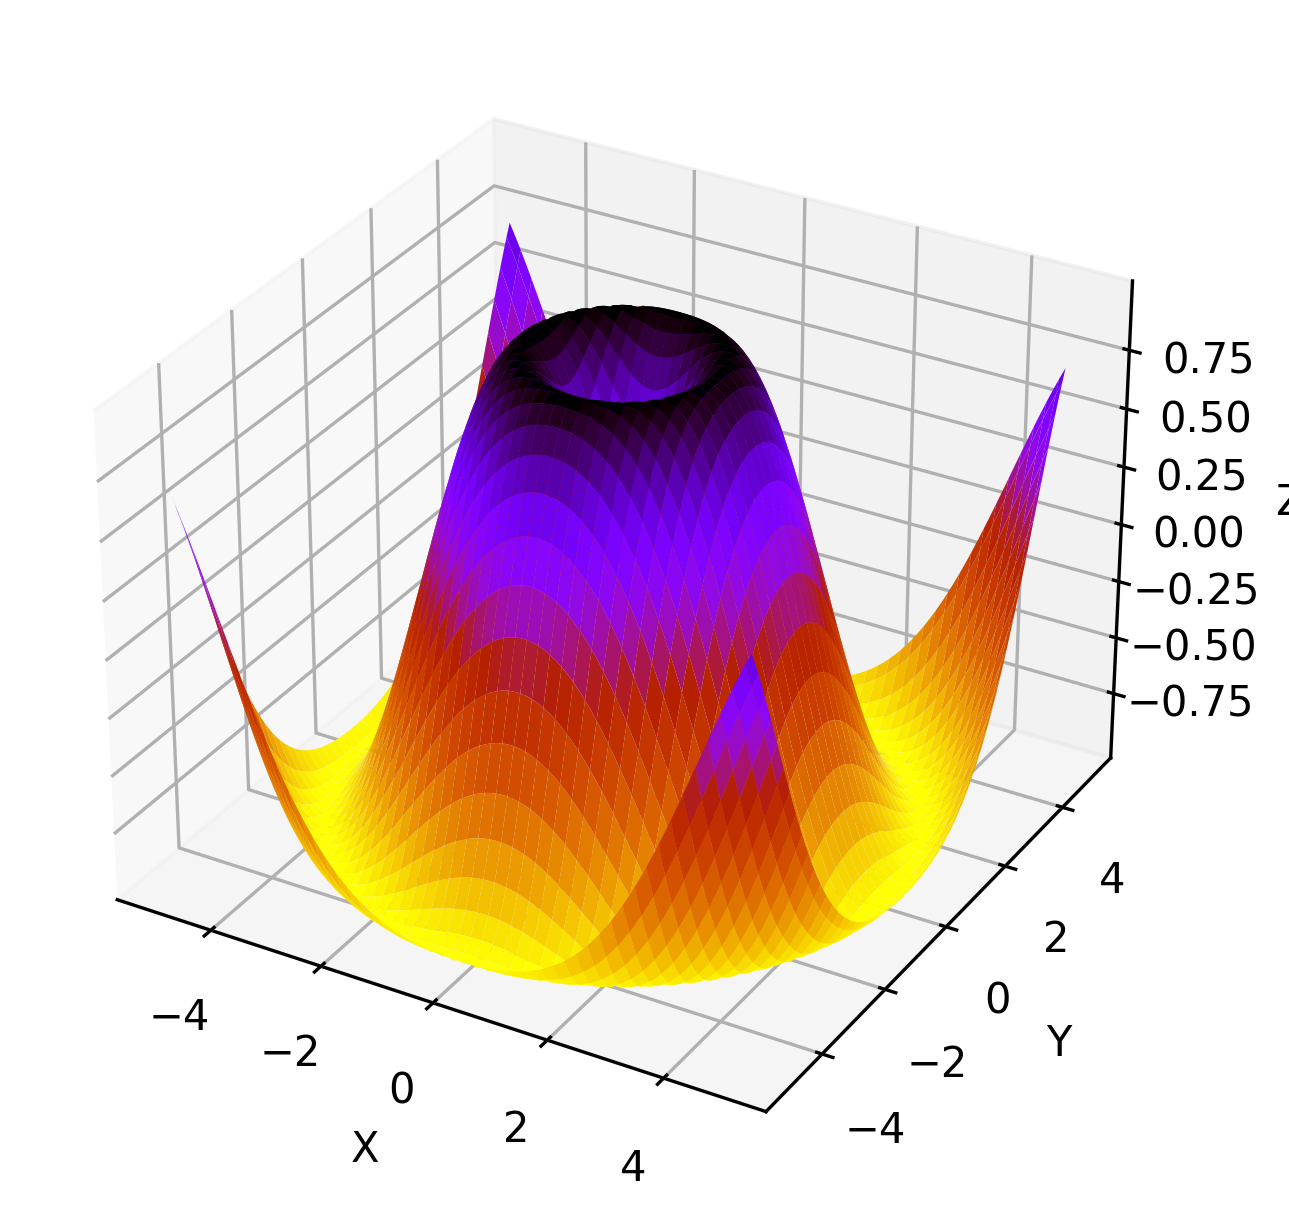

In [7]:
x= np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
x,y = np.meshgrid(x,y)
z = np.sin(np.sqrt(x**2+y**2))

figura = plt.figure(figsize=(10,5),dpi=300)
ejes = plt.axes(projection="3d")
ejes.plot_surface(x,y,z,cmap="gnuplot_r")
ejes.set_xlabel("X")
ejes.set_ylabel("Y")
ejes.set_zlabel("Z")
plt.show()

### **Gráfico en coordenadas polares**

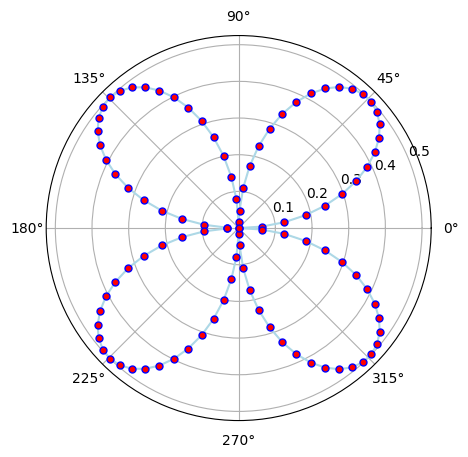

In [8]:
angulo = np.linspace(0,2*np.pi,100)
radio = np.abs(np.sin(angulo)*np.cos(angulo))

figura = plt.figure(figsize=(10,5),dpi=100)
ejes = plt.axes(projection="polar")
ejes.plot(angulo,radio,color="lightBlue",ls="-",marker="o",markersize=5,markeredgecolor="Blue",markerfacecolor="Red")
plt.show()



### **Leer y mostrar una imagen**

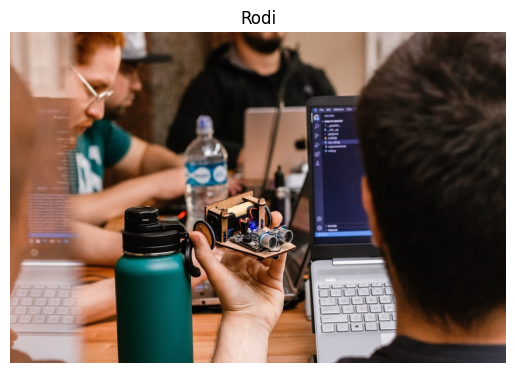

In [9]:
image = plt.imread("rodi.jpeg")
plt.imshow  (image)
plt.title("Rodi")
plt.axis("off")
plt.show()


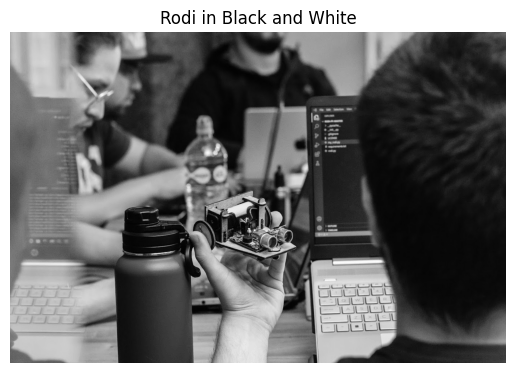

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the image
image = plt.imread("rodi.jpeg")

# Step 2: Convert the image to grayscale
# The conversion formula is a weighted sum of the R, G, and B components:
# grayscale = 0.2989 * R + 0.5870 * G + 0.1140 * B
grayscale_image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

# Step 3: Display the grayscale image
plt.imshow(grayscale_image, cmap='gray')
plt.title("Rodi in Black and White")
plt.axis("off")
plt.show()


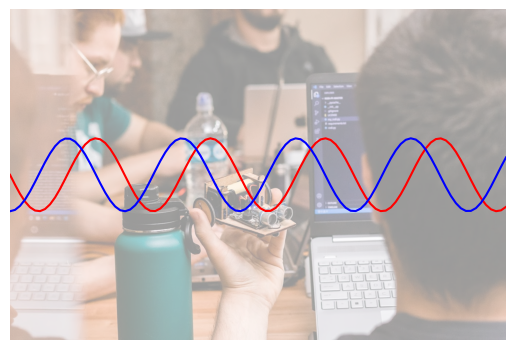

In [11]:
x = np.linspace(0,image.shape[1],100)
y1 = 100 * np.sin(x/50) + image.shape[0]/2
y2 = 100 * np.cos(x/50) + image.shape[0]/2

plt.imshow(image,alpha=0.4)
plt.plot(x,y1,color="red")
plt.plot(x,y2,color="blue")
plt.xlim(0,image.shape[1])
plt.axis("off")
plt.show()

In [12]:
import pandas as pd
df = pd.read_csv("datos_energia.csv")
df["País"].unique()


array(['Argentina', 'Brasil', 'Chile', 'Paraguay', 'Uruguay'],
      dtype=object)

In [13]:
datos_energia = np.genfromtxt("datos_energia.csv",delimiter=',',dtype=None, names=True,encoding="utf-8")

In [14]:
datos_energia[:5]

array([(2015, 'Argentina', 1200), (2016, 'Argentina', 1250),
       (2017, 'Argentina', 1300), (2018, 'Argentina', 1350),
       (2019, 'Argentina', 1400)],
      dtype=[('Año', '<i8'), ('País', '<U9'), ('Consumo', '<i8')])

In [15]:
anios = np.unique(datos_energia["Año"])
ultimo_año = anios.max()


In [16]:
consumo = {}

for info in datos_energia:
  if info["Año"] == ultimo_año:
    if info["País"] in consumo:
      consumo[info["País"]].append(info["Consumo"])
    else:
      consumo[info["País"]] = info["Consumo"]

pais_con_mayor_consumo = max(consumo,key=consumo.get)
pais_con_menor_consumo = min(consumo,key=consumo.get)
print(f"El país con mayor consumo en el año {ultimo_año} es {pais_con_mayor_consumo}")
print(f"El país con min consumo en el año {ultimo_año} es {pais_con_menor_consumo}")


consumo

El país con mayor consumo en el año 2020 es Brasil
El país con min consumo en el año 2020 es Uruguay


{'Argentina': 1450,
 'Brasil': 5500,
 'Chile': 1050,
 'Paraguay': 550,
 'Uruguay': 500}

In [17]:
consumo_inicial = {}

for info in datos_energia:
  if info["Año"] == anios.min():
    if info["País"] in consumo_inicial:
      consumo_inicial[info["País"]].append(info["Consumo_inicial"])
    else:
      consumo_inicial[info["País"]] = [info["Consumo"]]


crecimiento_porcentual = {
    pais: (np.array(consumo[pais]) - np.array(consumo_inicial[pais])) / np.array(consumo_inicial[pais]) * 100
    for pais in consumo
}
crecimiento_porcentual

{'Argentina': array([20.83333333]),
 'Brasil': array([10.]),
 'Chile': array([31.25]),
 'Paraguay': array([83.33333333]),
 'Uruguay': array([11.11111111])}

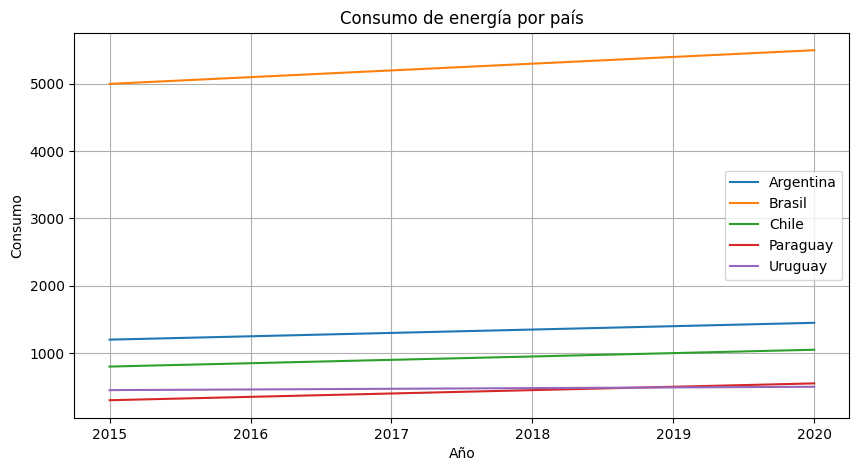

In [18]:
plt.figure(figsize=(10,5),dpi=100)

for pais in np.unique(datos_energia["País"]):
  datos_pais = datos_energia[datos_energia["País"] == pais]
  plt.plot(datos_pais["Año"],datos_pais["Consumo"],label=pais)

plt.legend()
plt.title("Consumo de energía por país")
plt.xlabel("Año")
plt.ylabel("Consumo")
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

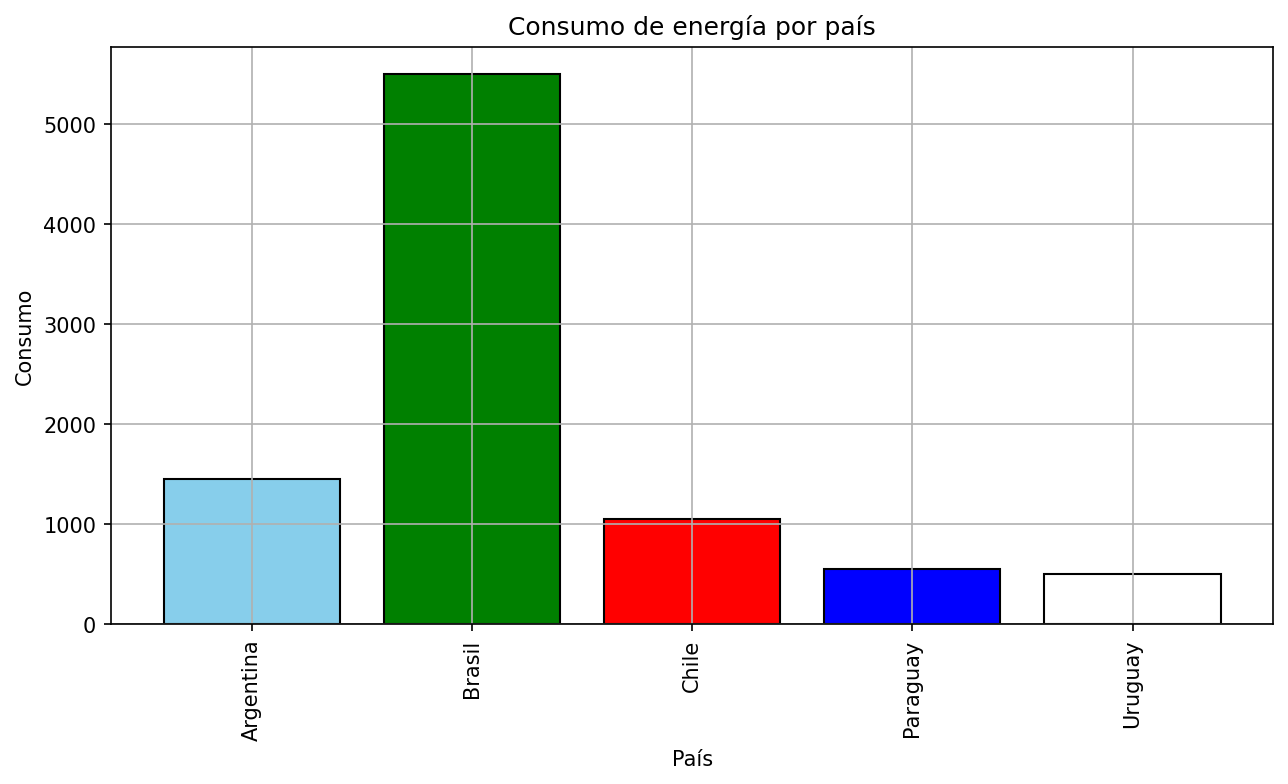

In [19]:
plt.clf()
plt.figure(figsize=(10,5), dpi=150)
plt.bar(consumo.keys(), consumo.values(), color=["skyblue","Green","red","Blue","white"], edgecolor="black")
plt.title("Consumo de energía por país")
plt.xlabel("País")
plt.ylabel("Consumo")
plt.grid()
plt.xticks(rotation=90)
plt.show()

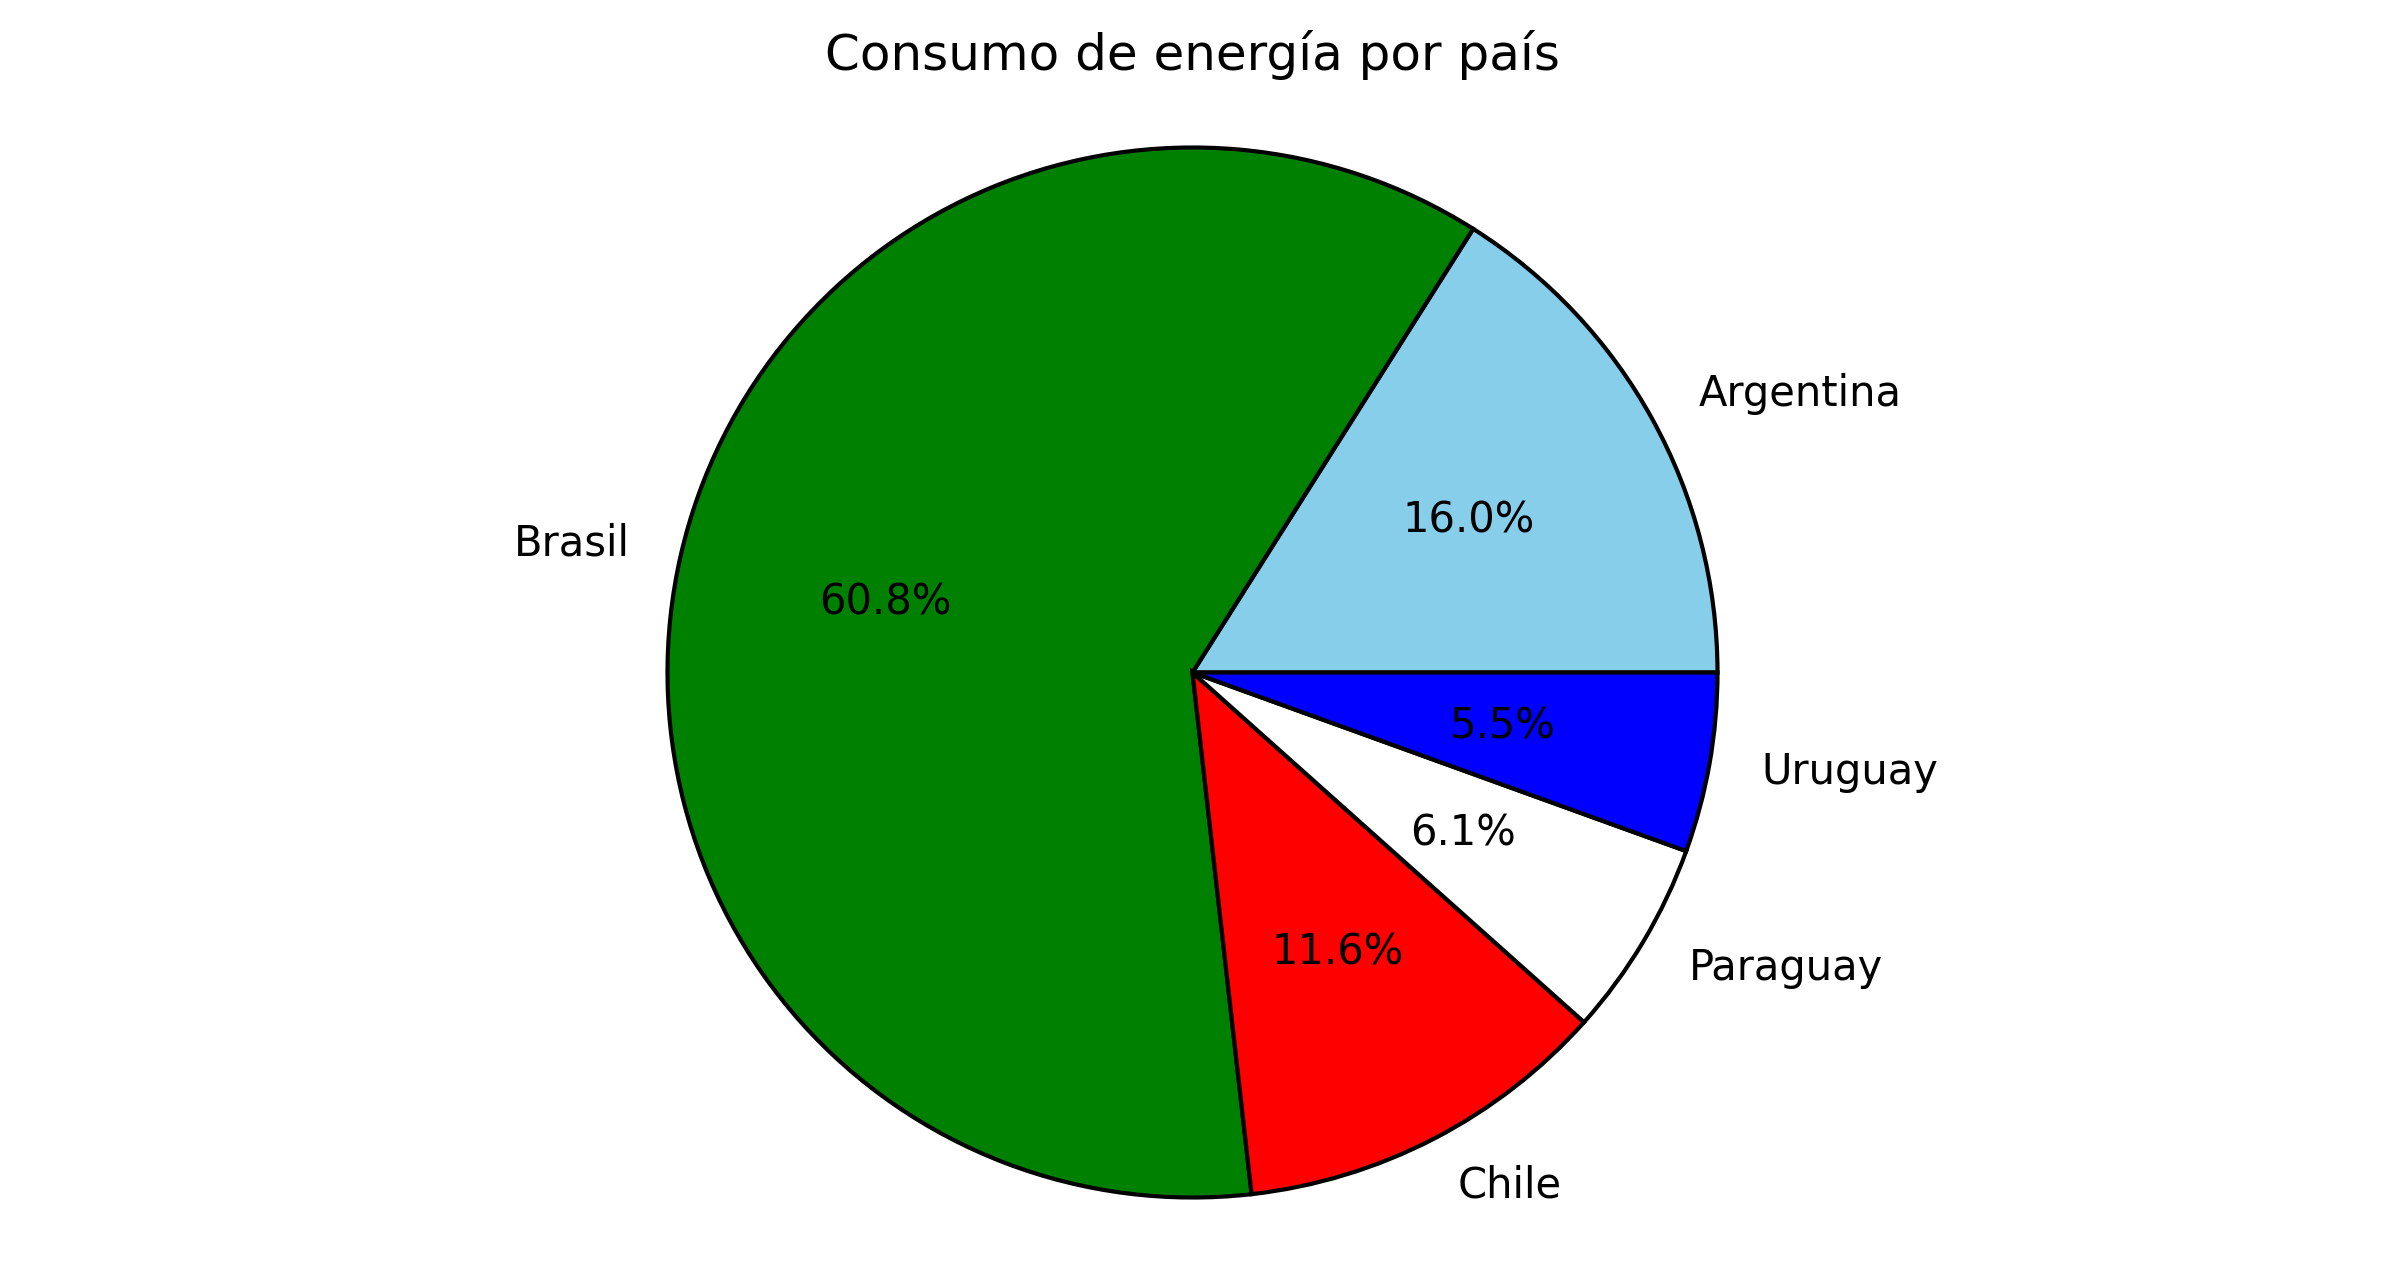

In [20]:
plt.figure(figsize=(10,5), dpi=300)
plt.pie(consumo.values(), labels=consumo.keys(), colors=["skyblue","Green","red","white","Blue"], autopct="%1.1f%%",wedgeprops={"edgecolor":"black"})
plt.title("Consumo de energía por país")
plt.axis("equal")
plt.show()